<a href="https://colab.research.google.com/github/nihdin/AppliedEconometrics/blob/master/AE04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stata codes

_sum nettfa if fsize==1_

In [0]:
    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      nettfa |      2,017    13.59498    47.59058     -143.5   1134.098


#####There are 2017 single people in the sample of 9275

_reg nettfa inc age if fsize==1_

In [0]:
      Source |       SS           df       MS      Number of obs   =     2,017
-------------+----------------------------------   F(2, 2014)      =    136.46
       Model |  544916.989         2  272458.495   Prob > F        =    0.0000
    Residual |  4021048.06     2,014  1996.54819   R-squared       =    0.1193
-------------+----------------------------------   Adj R-squared   =    0.1185
       Total |  4565965.05     2,016  2264.86361   Root MSE        =    44.683

------------------------------------------------------------------------------
      nettfa |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         inc |   .7993167   .0597307    13.38   0.000     .6821762    .9164572
         age |   .8426563   .0920169     9.16   0.000     .6621982    1.023115
       _cons |  -43.03981   4.080393   -10.55   0.000    -51.04204   -35.03758
------------------------------------------------------------------------------


##### **_$nettfa$_** = -43.04 + .799 **_$inc$_** + .843 **_$age$_**      
#####$n$ = 2,017,  $R^{2}$ = .119 

The coefficient on inc indicates that one more dollar in income (holding age fixed) is reflected  in  about  80  more  cents  in  predicted  nettfa.    
The coefficient  on  age  means  that,  holding  income  fixed, if  a  person  gets  another  year older, his/her nettfa is predicted to  increase by about $843.  (nettfa is in thousands of dollars)

##### The intercept doesn't have an interesting meaning since it gives the predicted nettfa when both inc and age equals 0. There will not be even one person with that values in the relevant population.

In [0]:
. test age==1

 ( 1)  age = 1

       F(  1,  2014) =    2.92
            Prob > F =    0.0874


In [2]:
install.packages("wooldridge")
library(wooldridge)
attach(k401ksubs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#p = 2* pt(-abs(-1.71), df=n-1)
pt(abs(-1.71), 2016, lower=FALSE)

[1] 0.04370987

#####Since the value of  Prob > F = 0.0874 that is larger than 1%, we fail to reject two-sided alternative H<sub>0</sub>: $\beta$<sub>2</sub> = 1 at the 1% level.

Also using the ttest in Stata, we find the tstatistic is (.843 -1)/0.092 = - 1.7065. Against the one sided alternative H<sub>1</sub> :$\beta$<sub>2</sub> < 1; the p-value found is 0.04371. Therefore we can reject the null hypothesis at the 5 percent significance level.

In [0]:
 reg nettfa inc if fsize==1

      Source |       SS           df       MS      Number of obs   =     2,017
-------------+----------------------------------   F(1, 2015)      =    181.60
       Model |  377482.064         1  377482.064   Prob > F        =    0.0000
    Residual |  4188482.98     2,015   2078.6516   R-squared       =    0.0827
-------------+----------------------------------   Adj R-squared   =    0.0822
       Total |  4565965.05     2,016  2264.86361   Root MSE        =    45.592

------------------------------------------------------------------------------
      nettfa |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         inc |   .8206815      .0609    13.48   0.000     .7012479     .940115
       _cons |  -10.57095   2.060678    -5.13   0.000    -14.61223   -6.529671
------------------------------------------------------------------------------


. corr inc age if fsize==1
(obs=2,017)

             |      inc      age
-------------+------------------
         inc |   1.0000
         age |   0.0391   1.0000

#####The slope coefficient for **_$inc$_** got by the regression analysis is only 0.8207, which is not a huge difference with 0.7993 obtained in part (ii). The why or why not question can be answered by computing the correlation between **_$inc$_** and **_$age$_** in the sample of single people, which turns about to be only 0.0391, and therefore gives an explanation why the simple and multiple regression estimate values got are not that different.

In [24]:
install.packages("wooldridge")
library(wooldridge)
data("econmath")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
colnames(econmath)
attach(econmath)
summary(econmath$score)
#econmath

[1] "age"      "work"     "study"    "econhs"   "colgpa"   "hsgpa"   
 [7] "acteng"   "actmth"   "act"      "mathscr"  "male"     "calculus"
[13] "attexc"   "attgood"  "fathcoll" "mothcoll" "score"

The following objects are masked from k401ksubs:

    age, male




   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.53   64.06   74.22   72.60   82.79   98.44 

#####The smallest and largest values in the sample are for the variable score are 19.53 and 98.44 respectively.

In [43]:
typeof(score)
help(double)
#double.xmax

[1] "double"

Double can give you values from 2e-308 to 2e+308 (can check using help(double)). But here in the dataset, the score varible can logically range frpom zero (minimum value) to 100 (maximum value)

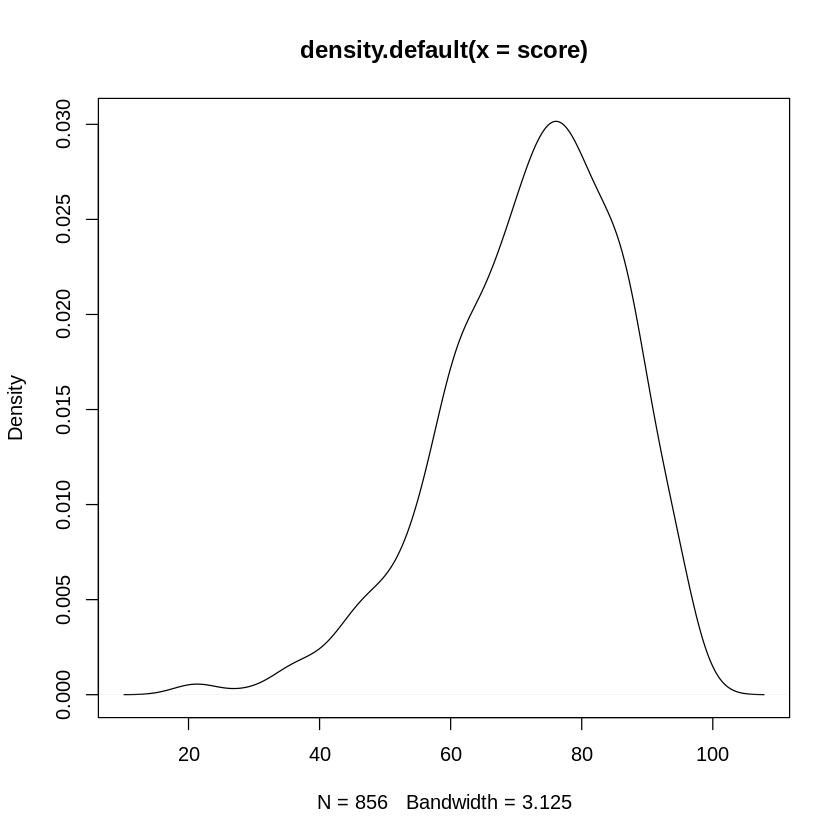

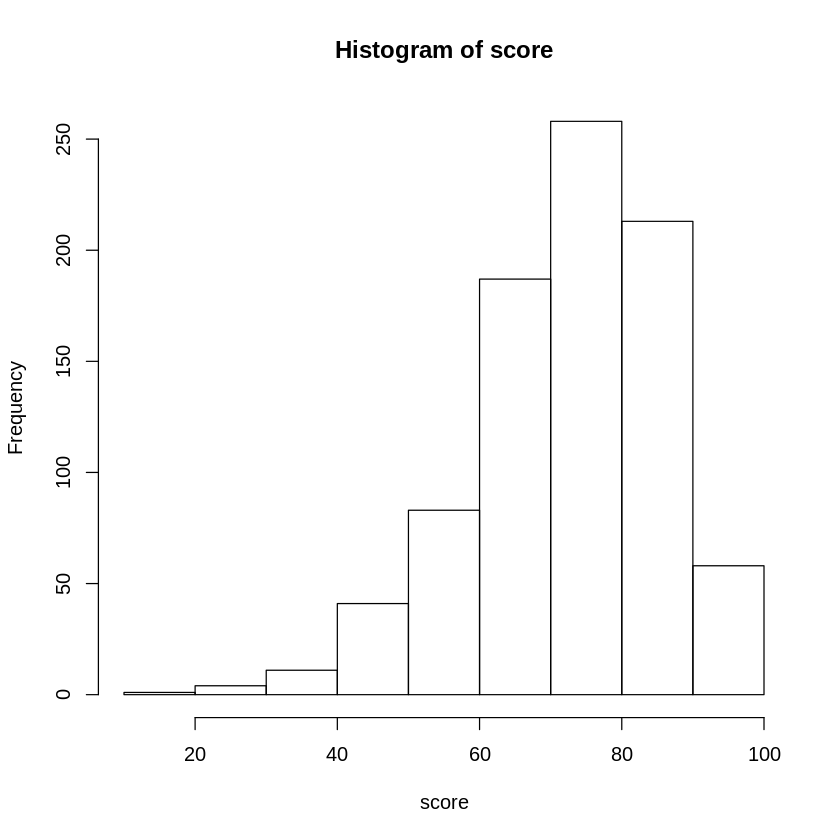

In [6]:
plot(density(score))
hist(score)

#####Normality will not play a role in the unbiasedness of OLS. It will not affect the conclusion that OLS is BLUE (best linear unbiased estimator) under the Guass Markov assumptions. The MLR.6 is required for exact inferences based on the t statistic and the F statistic. We do not have the need to abandon the t statistic to determine the statistically significant variables. Even if the variables do not follow a normal distribution, we can use the central limit theorm to conclude the OLS estimators can satisfy aymptotic normality (approximately normally distributed in large enough sample spaces)

In [45]:
lm1<-lm(score~colgpa+actmth+acteng)
summary(lm1)


Call:
lm(formula = score ~ colgpa + actmth + acteng)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.855  -6.215   0.444   6.812  32.670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.17402    2.80044   5.776 1.09e-08 ***
colgpa      12.36620    0.71506  17.294  < 2e-16 ***
actmth       0.88335    0.11220   7.873 1.11e-14 ***
acteng       0.05176    0.11106   0.466    0.641    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 810 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.3972,	Adjusted R-squared:  0.395 
F-statistic: 177.9 on 3 and 810 DF,  p-value: < 2.2e-16


#####H<sub>0</sub>: $\beta$<sub>3</sub>=0
t statistic can be calculated to be 0.47.
p-value= 1.3615
Since the p-value is too large and statistically insignificant, at every level, we cannot reject H<sub>0</sub>

In [7]:
2*pt(abs(0.47), 810)

[1] 1.361518

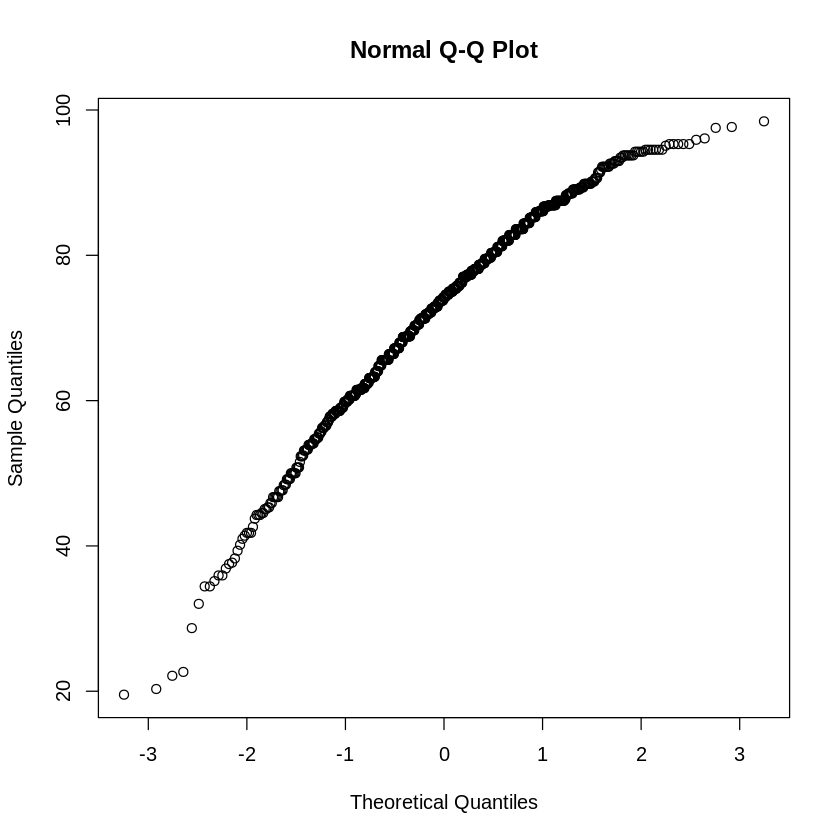

In [8]:
qqnorm(score)

Since the sample size is sufficiently large and the data is predominantly distributed within the 2 standard deviations, we can follow the t-distribution with sufficient degree of confidence to perform hypothesis testing using p-value.